# Linear Regression 

### Let's load the data and understand it

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv("D:/cs4/t2/data_mining/linear_regression-main/car_dataset.csv")

In [49]:
df.shape

(205, 26)

In [50]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [53]:
df.nunique()

ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [54]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Now, we can prepare the data for the linear regression model 

In [55]:
new_df = df[['enginesize', 'price']]
new_df

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


<AxesSubplot:xlabel='enginesize', ylabel='price'>

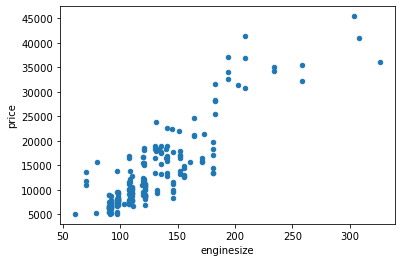

In [56]:
new_df.plot(x='enginesize', y='price', kind='scatter')	

<AxesSubplot:xlabel='fueltypes', ylabel='price'>

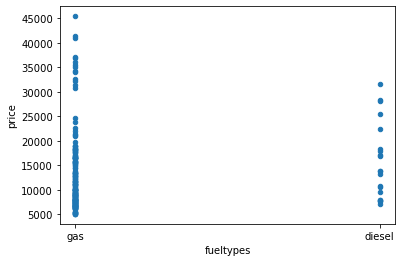

In [57]:
df.plot(x='fueltypes', y='price', kind='scatter')

In [58]:
x = new_df['enginesize']
y = new_df['price']

### Now Machine Learning

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [61]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (164,)
X_test: (41,)
Y_train: (164,)
Y_test: (41,)


In [62]:
model = LinearRegression()


In [63]:
model.fit(x_train.values.reshape(-1,1), y_train)  

LinearRegression()

In [64]:
model.coef_

array([164.31545172])

In [65]:
model.intercept_

-7613.370939489803

In [66]:
y_pred = model.predict(x_test.values.reshape(-1,1))

In [67]:
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  16835544.03813768


In [68]:
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  4103.113944084137


In [69]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  3195.0312395000433


In [70]:
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  0.7825324721447274


In [71]:
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  16835544.03813768
RMSE -->  4103.113944084137
MAE -->  3195.0312395000433
R2 -->  0.7825324721447274


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Predicted')

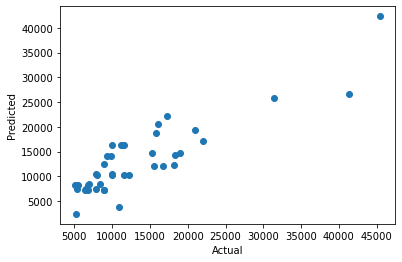

In [73]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='enginesize', ylabel='price'>

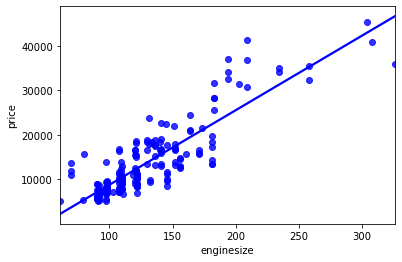

In [74]:
sns.regplot(x=x, y=y, ci=None, color ='blue')

### What about other independent variables?

<AxesSubplot:xlabel='horsepower', ylabel='price'>

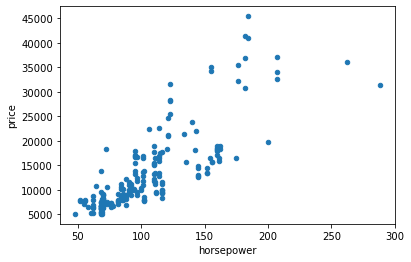

In [75]:
df.plot(x='horsepower', y='price', kind='scatter')

In [76]:
x = df[['enginesize', 'horsepower']]
x

,enginesize,horsepower
0,130,111
1,130,111
2,152,154
3,109,102
4,136,115
...,...,...
200,141,114
201,141,160
202,173,134
203,145,106


In [77]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [79]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (164, 2)
X_test: (41, 2)
Y_train: (164,)
Y_test: (41,)


In [80]:
model = LinearRegression()

In [81]:
model.fit(x_train, y_train)  

LinearRegression()

In [82]:
model.coef_

array([115.9909421,  64.2026329])

In [83]:
model.intercept_

-8148.677422999768

In [84]:
y_pred = model.predict(x_test)

In [85]:
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = math.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

In [86]:
print("MSE --> ", mse_2)
print("RMSE --> ", rmse_2)
print("MAE --> ", mae_2)
print("R2 --> ", r2_2)

MSE -->  15514797.066791011
RMSE -->  3938.8827180802186
MAE -->  3061.6172627779783
R2 -->  0.7995927808659935


Text(0, 0.5, 'Predicted')

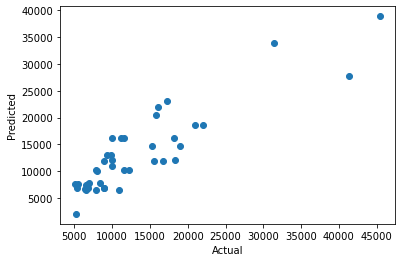

In [87]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='price'>

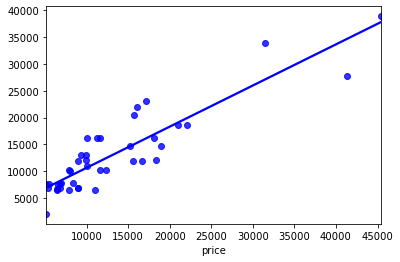

In [88]:
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

### Let's compare the metrics of two models

In [89]:
metrics = {
    'Model': ['First', 'Second'],
    'MSE' : [mse, mse_2],
    'RMSE' : [rmse, rmse_2],
    'MAE' : [mae, mae_2],
    'R2' : [r2, r2_2]
    }

metrics_df = pd.DataFrame(data=metrics)

In [90]:
# compare the values
metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,1.683554e+07,4103.113944,3195.031240,0.782532
1,Second,1.551480e+07,3938.882718,3061.617263,0.799593
